In [34]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
from PIL import Image
from empatches import EMPatches
import matplotlib.pyplot as plt

In [17]:
img_dir = os.path.join("..", "..", "raw-data", "embeddings", "experiment-0", "UNI")

os.path.isdir(img_dir)

True

In [18]:
img_name = os.listdir(img_dir)[0]

df = pd.read_parquet(os.path.join(img_dir, img_name))

df.head()

,coords,embedding,validity,processed_coords
0,patch-0-224-0-224,"[0.643192, 0.2199363, 0.45604688, -2.6054518, ...",False,"[0, 224, 0, 224]"
1,patch-224-448-0-224,"[0.89091444, 0.32569528, 0.6282622, -2.4381626...",False,"[224, 448, 0, 224]"
2,patch-448-672-0-224,"[0.7543198, 0.48000032, 0.80012953, -2.4537742...",False,"[448, 672, 0, 224]"
3,patch-672-896-0-224,"[0.80567425, 0.3716954, 0.82282245, -2.481556,...",False,"[672, 896, 0, 224]"
4,patch-896-1120-0-224,"[0.80049336, 0.27832162, 0.7032731, -2.4518306...",False,"[896, 1120, 0, 224]"


In [22]:
patch_dir = os.path.join("..", "..", "raw-data", "patches", "experiment-0", "10336")

patch_names = os.listdir(patch_dir)

In [33]:
patches = []
coords = []

for id in patch_names:
    patch_path = os.path.join(patch_dir, id)
    valid_img = df[df["coords"] == (Path(id).stem)]["validity"].item()
    patch_coords = df[df["coords"] == (Path(id).stem)]["processed_coords"].item()

    if valid_img: 
        patches.append(np.array(Image.open(patch_path)))
    
    else:
        patches.append(np.zeros((224, 224, 3)))

    coords.append(patch_coords)

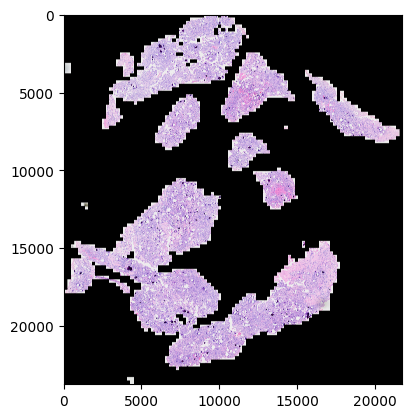

In [38]:
emp = EMPatches()
merged = emp.merge_patches(patches, coords).astype("uint8")

plt.imshow(merged)
plt.show()

In [39]:
plt.imsave("test.png", merged)